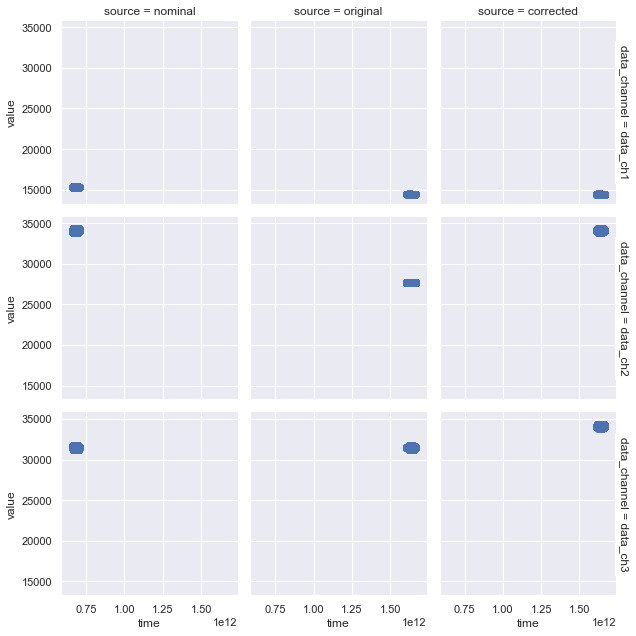

In [5]:
base = "D:\\Repos\Brass\\instrumentation-test-data\\mkz\\new_data\\base\\bad_01"
base_c = "D:\\Repos\Brass\\instrumentation-test-data\\mkz\\new_data\\base\\corrected_01"
base_n = "D:\\Repos\\Brass\\instrumentation-test-data\\mkz\\new_data\\base\\normal_01"

%run CSV_DataVizualizer.py -b $base -bc $base_c -bn $base_n